In [3]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# load the dataset
df = pd.read_csv("weather-stations.csv")
# print its shape and the 5 first lines
print (' Shape of the dataset : ' , df.shape)
df.head(5)

 Shape of the datset :  (1341, 25)


,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


There are 25 columns:

Stn_Name === Station Name
Prov === Province
Tm === Mean Temperature (°C)
Tn === Lowest Monthly Minimum Temperature
Tx === Highest Monthly Maximum Temperature
DwTm === Days Without Valid Mean Temperature
DwTx === Days Without Valid Maximum Temperature
DwTn === Days Without Valid Minimum Temperature
D === Mean Temperature Difference from Normal
S === Snowfall (cm)
DwS === Days Without Snowfall
S%N === Percent of Normal Snowfall
P === Total Precipitation (mm)
DwP === Days Without Valid Precipitation
P%N === Percent of Normal Precipitation
Pd === No. of days with precipitation 1mm or More
BS === Bright Sunshine days
DwBS === Days Without valid Bright Sunshine
BS% === Percent of Normal Bright Sunshine
HDD === Degree Days Below $18^{\circ}$C
CDD === Degree Days Above $18^{\circ}$C
Stn_No === Station Number; Climate Station Identifier (1st 3 Digits==Indicate drainage basin, Last 4 Digits Sorting Alphabetically)

In [6]:
# check the NAN values in the dataset
df.isna().sum()

Stn_Name       0
Lat            0
Long           0
Prov           0
Tm            85
DwTm          85
D            984
Tx            81
DwTx          81
Tn            81
DwTn          81
S            755
DwS          755
S%N         1143
P            114
DwP          114
P%N         1132
S_G          543
Pd           114
BS          1341
DwBS        1341
BS%         1341
HDD           85
CDD           85
Stn_No         0
dtype: int64

In [10]:
# the main features considered : Tm, Tx, Tn
# drop the NAN values on Tm, Tx, Tn cols 
df.dropna(subset=['Tm', 'Tx', 'Tn'], inplace=True)
print('We can consider', df.shape[0] , 'after dropping rows with NAN values on Mean, Max and min temp')

We can consider (1255, 25) after dropping rows with NAN values on Mean, Max and min temp


The matplotlib basemap toolkit is a library for plotting 2D data on maps in Python ( see: https://matplotlib.org/basemap/users/intro.html) 

"Basemap does not do any plotting on it’s own, but provides the facilities to transform coordinates to one of 25 different map projections"


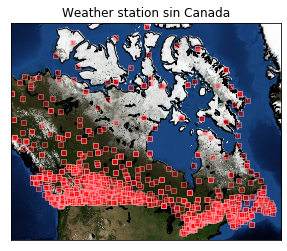

In [45]:
# plot the weather stations using Basemap 
from mpl_toolkits.basemap import Basemap
import matplotlib
# import Pillow to manage and manipulate images 
from PIL import Image 
import matplotlib.pyplot as plt
# pylab used to facilitate th amnip of Numpy and matplotlib
#reParams to customize the default params of matplotlib
import pylab as p
#from pylab import rcParams
#rcParams['figure.figsize']=(14,10)
minlong=-140
maxlong=-50
minlat=40
maxlat=75

#selecting the boundaries of the map 
df= df[(df['Long']>minlong) & (df['Long']<maxlong) & (df['Lat']>minlat) & (df['Lat']<maxlat)]
#type de projection : Mercator, low resolution
#the boundaries of the map : 
my_map= Basemap(projection='merc',
               resolution='l', area_thresh= 1000.0,
               llcrnrlon=minlong, urcrnrlon=maxlong,
               llcrnrlat=minlat, urcrnrlat=maxlat)
my_map.drawcoastlines()
my_map.drawcountries()
#to draw a high resolution land-sea mask as an image with land and ocean colors specified 
#my_map.drawlsmask(land_color="green", ocean_color="skyblue")
my_map.bluemarble()

#to convert Latitude and Longitude to x/y map projection coordinates
xs, ys = my_map(np.asarray(df.Long), np.asarray(df.Lat))
df['xm']= xs.tolist()
df['ym']= ys.tolist()

#Visualization
for index,row in df.iterrows():
    my_map.plot(row.xm, row.ym,markerfacecolor ='red',markeredgecolor='pink', marker='s', markersize= 5, alpha = 0.4)
plt.title('Weather station sin Canada')  
plt.savefig('wsc.png', dpi=300)
plt.show()

In [75]:
#Clustering the Data (Temperatures & Coordinates as Features)
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
 
df_clus_temp= df[['Tm','Tx','Tn', 'xm','ym']]
#Standardize features by removing the mean and scaling to unit variance
df_clus_temp= StandardScaler().fit_transform(df_clus_temp)

DB= DBSCAN(eps=0.3, min_samples=15).fit(df_clus_temp)
labels= DB.labels_
print (labels[100:150])
df['clus']=labels
clus_number= len(set(labels)) - (-1 if -1 in labels else 0)
print(set(labels))
print(clus_number)

[ 1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0
  0  0]
{0, 1, 2, 3, 4, 5, 6, -1}
9


Cluster 0, Average Mean Temp: 6.231168831168831
Cluster 1, Average Mean Temp: 6.768421052631578
Cluster 2, Average Mean Temp: -11.260629921259845
Cluster 3, Average Mean Temp: -4.122
Cluster 4, Average Mean Temp: -18.53611111111111
Cluster 5, Average Mean Temp: -16.397472924187724
Cluster 6, Average Mean Temp: -9.753333333333334


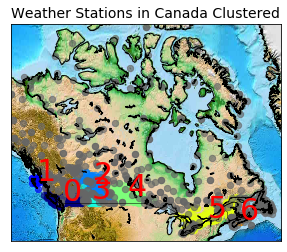

In [84]:
#Visualise the clusters
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

my_map=Basemap(projection='merc',
              resolution='l', area_thresh=1000.0,
              llcrnrlon=minlong, urcrnrlon=maxlong,
               llcrnrlat=minlat, urcrnrlat=maxlat)
my_map.drawcoastlines()
my_map.drawcountries()
my_map.etopo()
# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clus_number))


for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = df[df.clus == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 40, alpha = 0.65)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=30, color='red',)
        print ("Cluster "+str(clust_number)+', Average Mean Temp: '+ str(np.mean(clust_set.Tm)))
plt.title("Weather Stations in Canada Clustered" ,fontsize=14)        
plt.savefig("etopo_cluster.png", dpi=300)
